In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import pandas as pd
import statsmodels.tsa.stattools as ts
from scipy.stats import linregress

In [2]:
def download_data(stock, start, end):
    stock_data = {}
    ticker = yf.download(stock, start, end)
    stock_data['price'] = ticker['Adj Close']
    return pd.DataFrame(stock_data)

In [4]:
def plot_pairs(data1, data2):
    fig, (ax1, ax2)  = plt.subplots(2)
    fig.suptitle('Pair of Stocks')
    ax1.plot(data1)
    ax2.plot(data2)
    plt.show()

In [3]:
def scater_plot(data1,  data2):
    plt.scatter(data1.values, data2.values)
    plt.xlabel('XOM')
    plt.ylabel('CVX')
    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


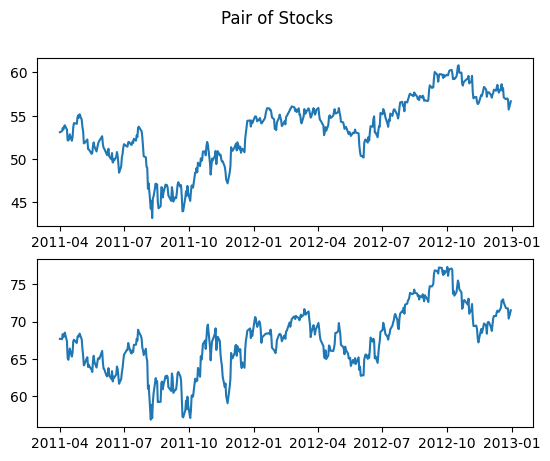

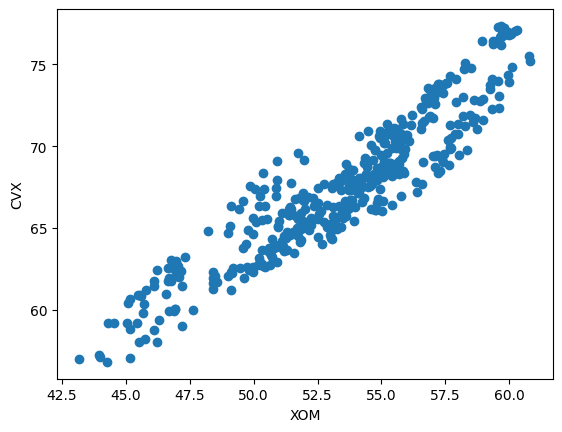

LinregressResult(slope=1.0424934727363946, intercept=11.78935743161238, rvalue=0.9298663585754737, pvalue=2.5160768721105617e-192, stderr=0.0197080005406871, intercept_stderr=1.0555971422176855)
(-3.438174728328244, 0.009724329173335966, 0, 439, {'1%': -3.4453339386510784, '5%': -2.868146269723016, '10%': -2.5702889034926137}, 689.7063623636212)


In [5]:
start_date = datetime.datetime(2011, 4, 1)
end_date = datetime.datetime(2013, 1,  1)

pair1 = download_data('XOM', start_date, end_date)
pair2 = download_data('CVX', start_date, end_date)

    #print(pair1)
    #print(pair1.values)
    
plot_pairs(pair1, pair2)
scater_plot(pair1, pair2)

    #linear regression
    #print(pair1.values)
    #print(pair1.values[:, 0])

result = linregress(pair1.values[:,  0], pair2.values[:,  0])
print(result)

    #проверка на стационарность
residuals = pair1 - result.slope * pair2

adf = ts.adfuller(residuals)
print(adf)
